In [855]:
# Import required packages for this project.
from pathlib import Path

import math
import statistics

import os
import calendar
import numpy as np
from numpy import mean
from numpy import std
from numpy import absolute
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet, Lasso, Ridge

from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

import scipy.stats
from scipy import stats
from scipy.stats import anderson
from scipy.stats import ttest_ind

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

from IPython.display import Image
Image("img/Model_Comparison.png")

%matplotlib inline

In [856]:
# Established path to access data for this assignment.
DATA = Path("C:\\Users\\rcc_0\\OneDrive\\Documents\\ANA 620\\Assignment_4")

In [857]:
# Load the required data for the first part of assigment.
Drug_df = pd.read_csv(DATA / 'HW4_DrugCost.csv')

# View some initial records.
Drug_df.head()

,COST,RXPM,GS,RI,COPAY,AGE,F,MM,ID
0,1.34,4.2,36,45.6,10.87,29.7,52.3,1158096,MN1
1,1.34,5.4,37,45.6,8.66,29.7,52.3,1049892,MN2
2,1.38,7.0,37,45.6,8.12,29.7,52.3,96168,MN3
3,1.22,7.1,40,23.6,5.89,28.7,53.4,407268,GA
4,1.08,3.5,40,23.6,6.05,28.7,53.4,13224,GA2


In [858]:
# Generate dataframe dimensions.
Drug_df.shape

(29, 9)

In [859]:
# Generate variable data types.
Drug_df.dtypes

COST     float64
RXPM     float64
GS         int64
RI       float64
COPAY    float64
AGE      float64
F        float64
MM         int64
ID        object
dtype: object

In [860]:
# Generate number of missing values.
Drug_df.isna().sum()

COST     0
RXPM     0
GS       0
RI       0
COPAY    0
AGE      0
F        0
MM       0
ID       0
dtype: int64

Specific Evaluation and Preparation of Dataset Variables

In [861]:
Drug_df.describe().map('{:,.3f}'.format)

,COST,RXPM,GS,RI,COPAY,AGE,F,MM
count,29.000,29.000,29.000,29.000,29.000,29.000,29.000,29.000
mean,1.233,5.972,39.241,15.703,6.168,29.086,52.372,"410,991.793"
std,0.110,1.676,5.872,12.725,1.436,1.289,1.782,"410,180.675"
min,0.990,2.800,16.000,0.300,4.130,25.200,49.000,491.000
25%,1.160,5.200,37.000,7.000,5.270,28.500,51.400,"73,380.000"
50%,1.230,6.100,40.000,12.900,5.710,29.100,52.300,"303,312.000"
75%,1.340,7.000,42.000,21.300,6.270,29.800,53.400,"591,456.000"
max,1.380,10.700,50.000,45.600,10.870,32.400,57.200,"1,388,605.000"


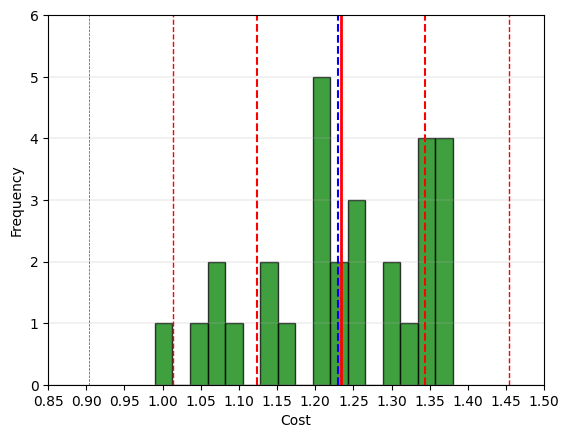

In [862]:
# Histogram for the 'COST' continuous variable.
plt.hist(Drug_df['COST'], bins = 17, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.xlim(0.85, 1.5)
plt.xticks(np.arange(0.85,1.55,step=0.05))
plt.yticks(np.arange(0,7,step=1))

mean_value = Drug_df['COST'].mean()
median_value = Drug_df['COST'].median()
std_value = Drug_df['COST'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

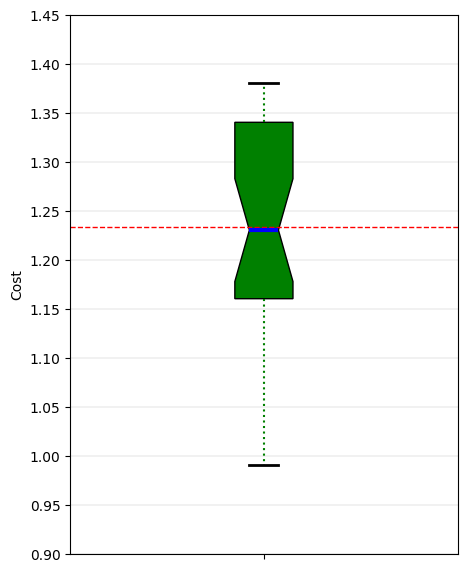

In [863]:
# Boxplot for the 'COST' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['COST'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Cost')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0.9,1.5,step=0.05)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [864]:
# 'COST' Anderson-Darling Normality Test
result = anderson(Drug_df['COST'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.472
15.000: 0.520, data looks normal (fail to reject H0)
10.000: 0.592, data looks normal (fail to reject H0)
5.000: 0.710, data looks normal (fail to reject H0)
2.500: 0.828, data looks normal (fail to reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


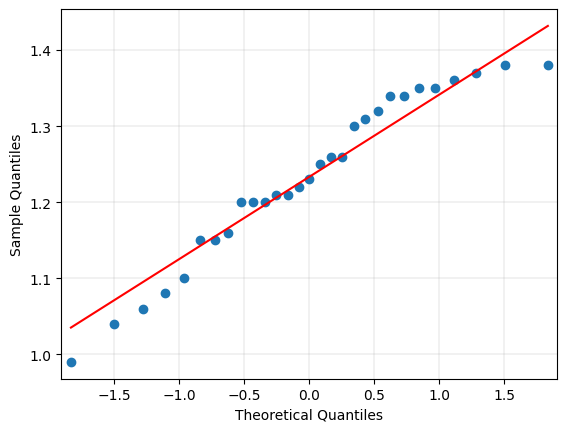

In [865]:
# 'COST' QQ plot
qqplot(Drug_df['COST'], line='s')
plt.grid(linewidth=0.25)
plt.show()

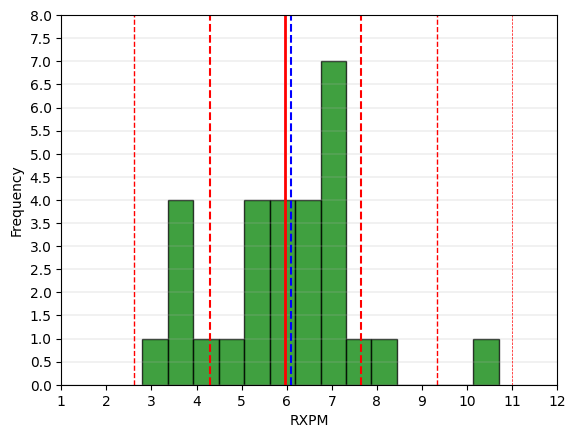

In [866]:
# Histogram for the 'RXPM' continuous transformed variable.
plt.hist(Drug_df['RXPM'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('RXPM')
plt.ylabel('Frequency')
plt.xlim(2,11.5)
plt.xticks(np.arange(1,12.1,step=1))
plt.yticks(np.arange(0,8.1,step=0.5))

mean_value = Drug_df['RXPM'].mean()
median_value = Drug_df['RXPM'].median()
std_value = Drug_df['RXPM'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

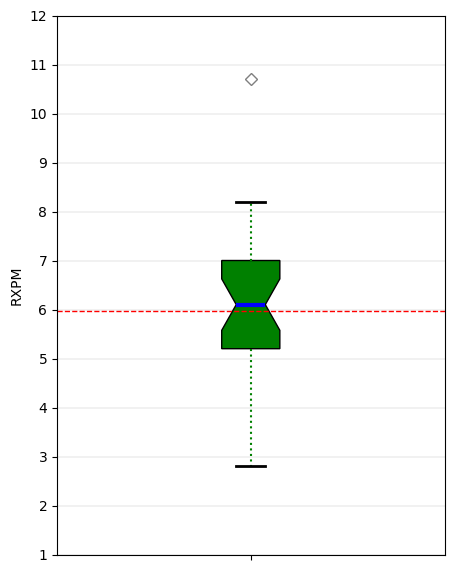

In [867]:
# Boxplot for the 'RXPM' continuous transformed variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['RXPM'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('RXPM')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(1,12.1,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [868]:
# 'RXPM' Anderson-Darling Normality Test
result = anderson(Drug_df['RXPM'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.529
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data looks normal (fail to reject H0)
5.000: 0.710, data looks normal (fail to reject H0)
2.500: 0.828, data looks normal (fail to reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


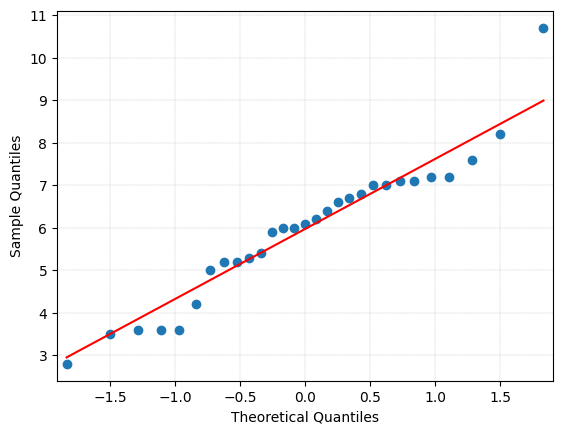

In [869]:
# 'RXPM' QQ plot
qqplot(Drug_df['RXPM'], line='s')
plt.grid(linestyle='dashed', linewidth=0.25)
plt.show()

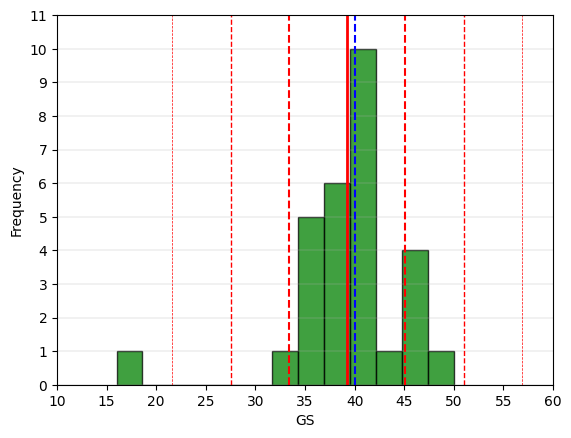

In [870]:
# Histogram for the 'GS' continuous variable.
plt.hist(Drug_df['GS'], bins = 13, alpha = 0.75, color = 'green', edgecolor = 'black', align='mid')
plt.xlabel('GS')
plt.ylabel('Frequency')
plt.xticks(np.arange(10,60.1,step=5))
plt.yticks(np.arange(0,12,step=1))

mean_value = Drug_df['GS'].mean()
median_value = Drug_df['GS'].median()
std_value = Drug_df['GS'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

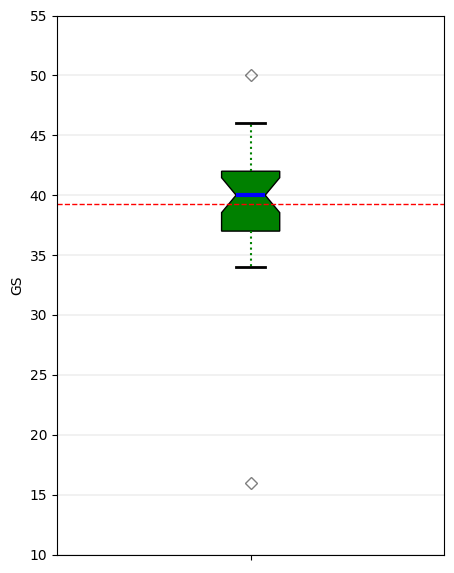

In [871]:
# Boxplot for the 'GS' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['GS'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('GS')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(10,56,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [872]:
# 'GS' Anderson-Darling Normality Test
result = anderson(Drug_df['GS'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.205
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data does not look normal (reject H0)


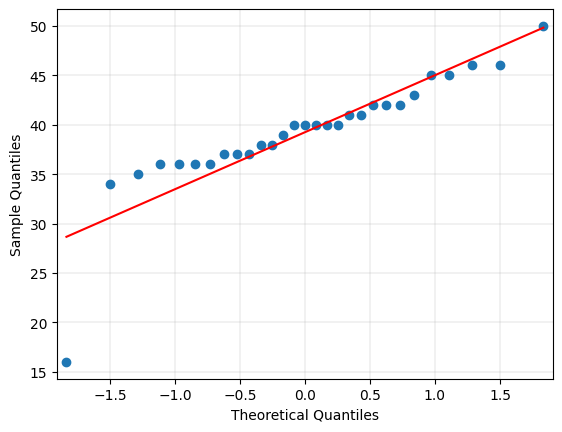

In [873]:
# 'GS' QQ plot
qqplot(Drug_df['GS'], line='s')
plt.grid(linewidth=0.25)
plt.show()

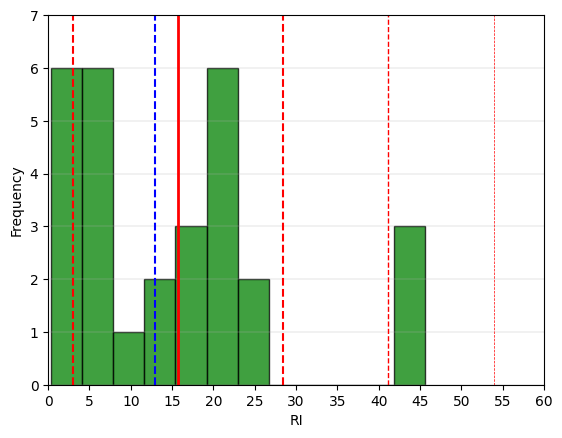

In [876]:
# Histogram for the 'RI' continuous variable.
plt.hist(Drug_df['RI'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('RI')
plt.ylabel('Frequency')
plt.xlim(0,60)
plt.xticks(np.arange(0,61,step=5))
plt.yticks(np.arange(0,8,step=1))

mean_value = Drug_df['RI'].mean()
median_value = Drug_df['RI'].median()
std_value = Drug_df['RI'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

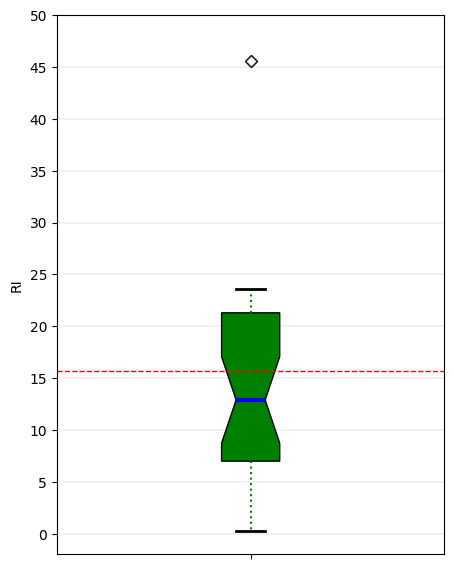

In [877]:
# Boxplot for the 'RI' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['RI'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('RI')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,51,step=5)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [878]:
# 'RI' Anderson-Darling Normality Test
result = anderson(Drug_df['RI'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.258
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data does not look normal (reject H0)


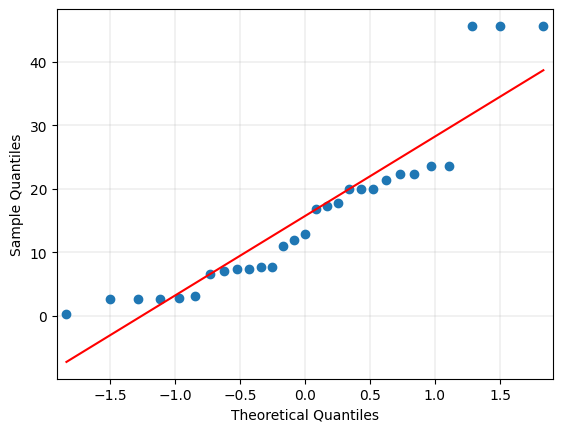

In [879]:
# 'RI' QQ plot
qqplot(Drug_df['RI'], line='s')
plt.grid(linewidth=0.25)
plt.show()

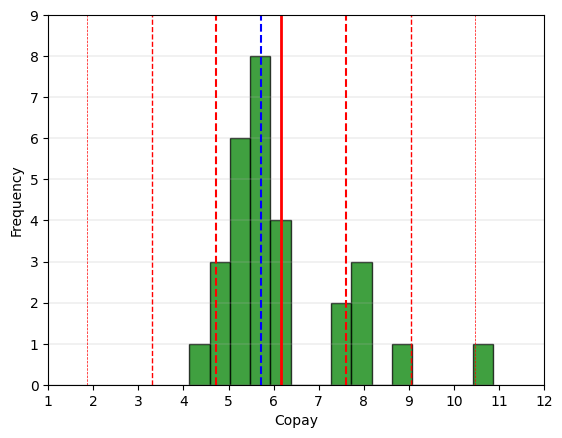

In [880]:
# Histogram for the 'COPAY' continuous variable.
plt.hist(Drug_df['COPAY'], bins = 15, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Copay')
plt.ylabel('Frequency')
plt.xlim(1, 12)
plt.xticks(np.arange(1,13,step=1))
plt.yticks(np.arange(0,10,step=1))

mean_value = Drug_df['COPAY'].mean()
median_value = Drug_df['COPAY'].median()
std_value = Drug_df['COPAY'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

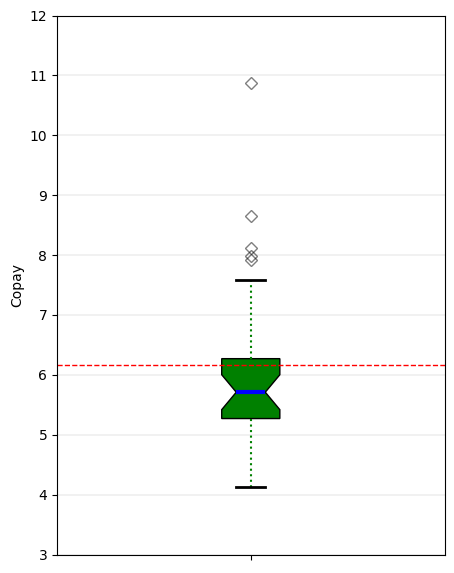

In [881]:
# Boxplot for the 'COPAY' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['COPAY'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Copay')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(3,13,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [882]:
# 'COPAY' Anderson-Darling Normality Test
result = anderson(Drug_df['COPAY'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.722
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data does not look normal (reject H0)


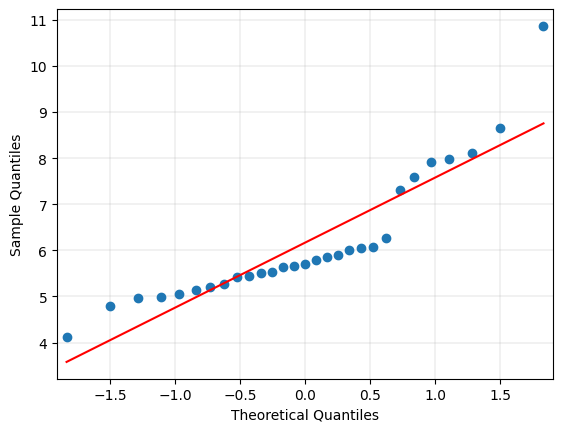

In [883]:
# 'COPAY' QQ plot
qqplot(Drug_df['COPAY'], line='s')
plt.grid(linewidth=0.25)
plt.show()

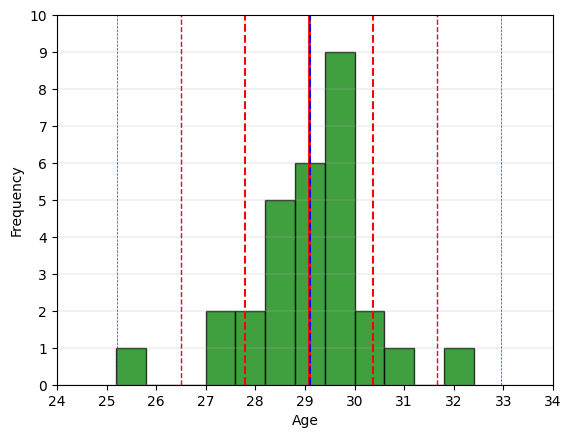

In [884]:
# Histogram for the 'AGE' continuous variable.
plt.hist(Drug_df['AGE'], bins = 12, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xlim(24, 34)
plt.xticks(np.arange(24,35,step=1))
plt.yticks(np.arange(0,11,step=1))

mean_value = Drug_df['AGE'].mean()
median_value = Drug_df['AGE'].median()
std_value = Drug_df['AGE'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

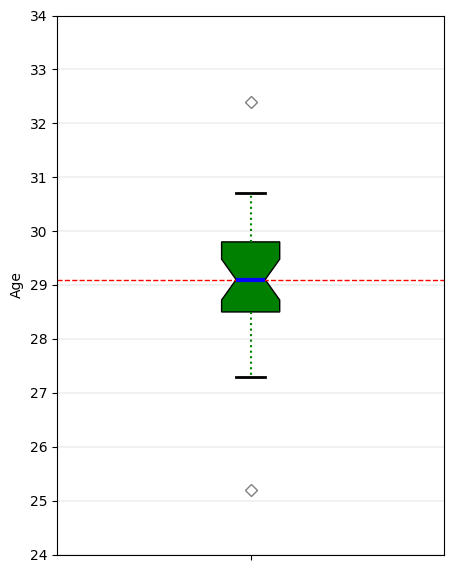

In [885]:
# Boxplot for the 'AGE' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['AGE'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Age')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(24,35,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [886]:
# 'AGE' Anderson-Darling Normality Test
result = anderson(Drug_df['AGE'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.832
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


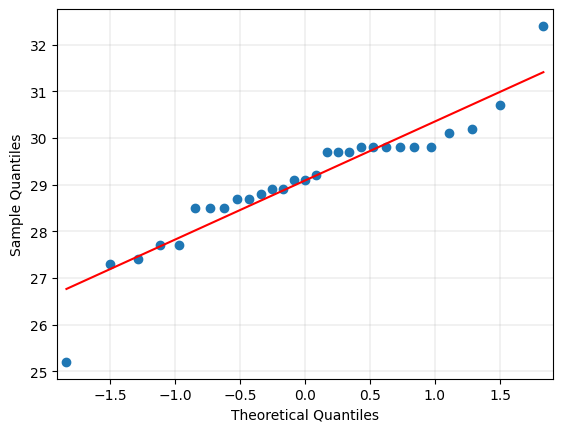

In [887]:
# 'AGE' QQ plot
qqplot(Drug_df['AGE'], line='s')
plt.grid(linewidth=0.25)
plt.show()

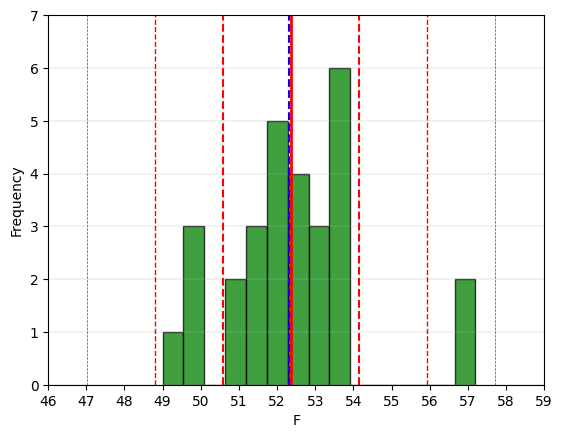

In [888]:
# Histogram for the 'F' continuous variable.
plt.hist(Drug_df['F'], bins = 15, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('F')
plt.ylabel('Frequency')
plt.xlim(46, 59)
plt.xticks(np.arange(46,60,step=1))
plt.yticks(np.arange(0,8,step=1))

mean_value = Drug_df['F'].mean()
median_value = Drug_df['F'].median()
std_value = Drug_df['F'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

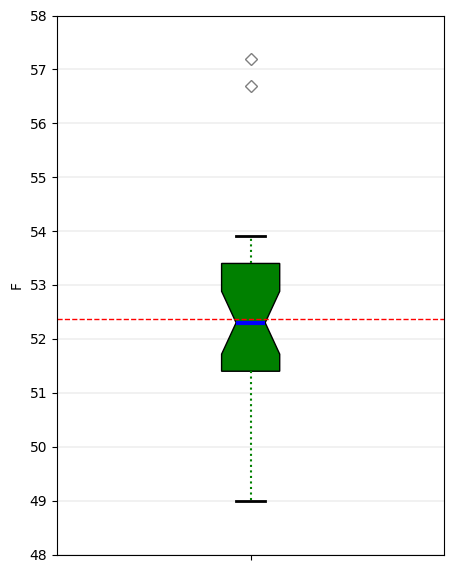

In [889]:
# Boxplot for the 'F' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['F'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('F')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(48,59,step=1)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [890]:
# 'F' Anderson-Darling Normality Test
result = anderson(Drug_df['F'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.714
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data looks normal (fail to reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


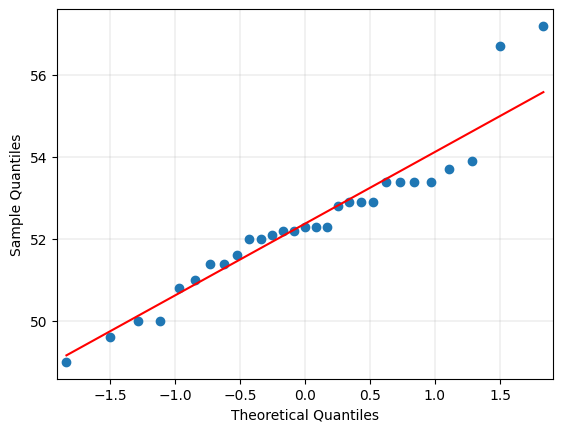

In [891]:
# 'F' QQ plot
qqplot(Drug_df['F'], line='s')
plt.grid(linewidth=0.25)
plt.show()

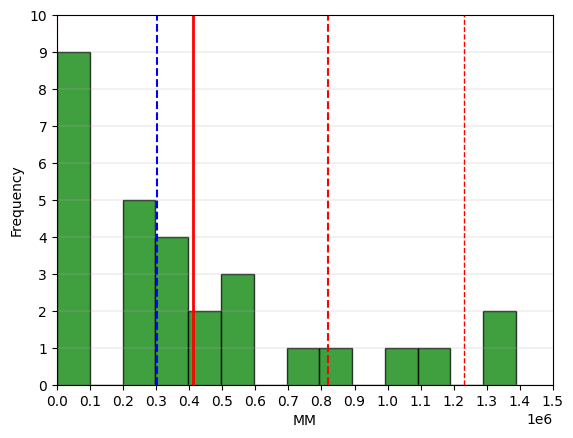

In [892]:
# Histogram for the 'MM' continuous variable.
plt.hist(Drug_df['MM'], bins = 14, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('MM')
plt.ylabel('Frequency')
plt.xlim(0, 1500000)
plt.xticks(np.arange(0,1500001,step=100000))
plt.yticks(np.arange(0,11,step=1))

mean_value = Drug_df['MM'].mean()
median_value = Drug_df['MM'].median()
std_value = Drug_df['MM'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.grid(axis='y', linewidth=0.25)
plt.show()

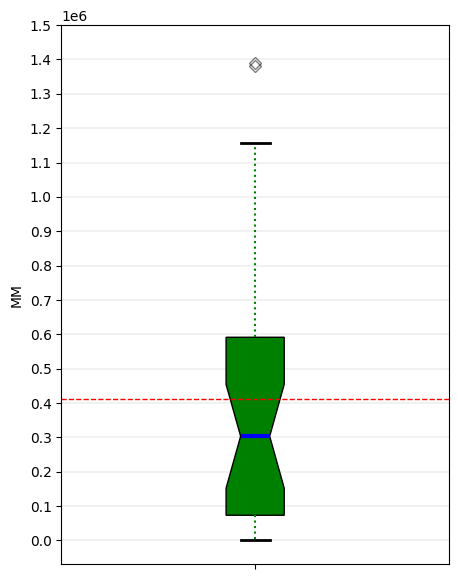

In [893]:
# Boxplot for the 'MM' continuous variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Drug_df['MM'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('MM')  
ax.set_xticklabels('')

# Set axis limits.
plt.yticks(np.arange(0,1500001,step=100000)) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.grid(axis='y', linewidth=0.25)
plt.show()

In [894]:
# 'MM' Anderson-Darling Normality Test
result = anderson(Drug_df['MM'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.324
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data does not look normal (reject H0)


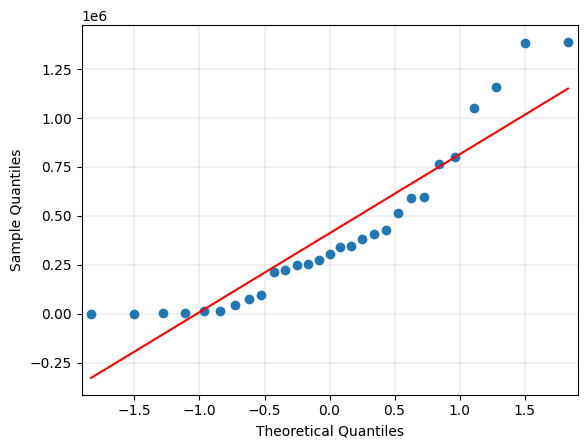

In [895]:
# 'MM' QQ plot
qqplot(Drug_df['MM'], line='s')
plt.grid(linewidth=0.25)
plt.show()

In [896]:
# Create dataframe of continuous variables for correlation analysis.
Drug_corr = Drug_df[['COST','RXPM','GS', 'RI', 'COPAY', 'AGE', 'F', 'MM']].copy()

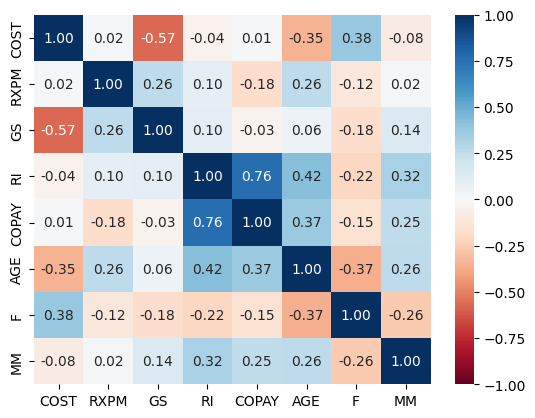

In [897]:
# Generate heatmap for correlation matrix analysis.
corr = Drug_corr.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

1.  Generate a scatter plot matrix of the following continuous variables: COST, RXPM, COPAY, and AGE. 
Briefly explain the relationships that you see among them (10 points). 

In [898]:
# Create dataframe of required continuous variables for scatter plot matrix.
Drug_plot = Drug_df[['COST','RXPM', 'COPAY', 'AGE']].copy()

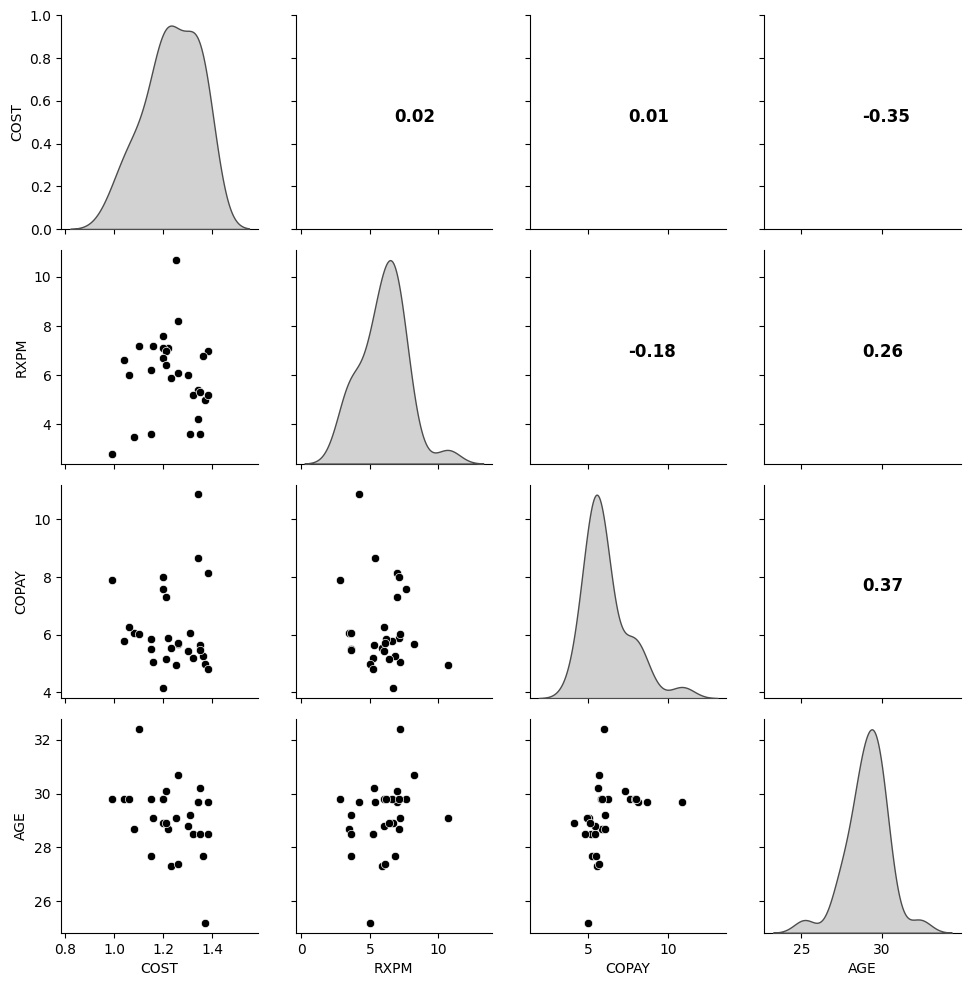

In [899]:
# Generate required scatter plot matrix.
def corrfunc(x, y, **kws):
    """Calculates and displays the correlation coefficient."""
    r = x.corr(y)
    ax = plt.gca()
    ax.annotate(f"{r:.2f}", xy=(.5, .5), xycoords=ax.transAxes, fontsize=12, fontweight='bold')

def create_scatterplot_matrix(data, variables=None, hue=None, diag_kind='auto', markers=None, color=None, size=1, alpha=1, palette=None, corner=False, plot_kws=None, diag_kws=None):
    """
    Creates a configurable scatter plot matrix using Seaborn's pairplot.

    Args:
        data (pd.DataFrame): The data to plot.
        variables (list, optional): List of variables to plot. If None, all numeric variables are used.
        hue (str, optional): Variable to map plot aspects to different colors.
        diag_kind (str, optional): Kind of plot for the diagonal subplots ('auto', 'hist', 'kde').
        markers (list or dict, optional): Markers for different hue levels.
        size (float, optional): Size of the markers.
        alpha (float, optional): Transparency of the markers.
        palette (str or list, optional): Color palette for the hue variable.
        corner (bool, optional): If True, only the lower triangle of the matrix is shown.
        plot_kws (dict, optional): Keyword arguments for the scatter plots.
        diag_kws (dict, optional): Keyword arguments for the diagonal plots.

    Returns:
        sns.PairGrid: The PairGrid object containing the scatter plot matrix.
    """
# Configure the plot

    if plot_kws is None:
        plot_kws = {}
        plot_kws.setdefault('s', size**2)
        plot_kws.setdefault('alpha', alpha)
    return grid

grid = sns.PairGrid(Drug_plot, diag_sharey=False, corner=False)
grid.map_upper(corrfunc)
grid.map_diag(sns.kdeplot, fill=True, color=".3")
grid.map_lower(sns.scatterplot, color='k')
  
if __name__ == '__main__':

    grid = create_scatterplot_matrix(Drug_plot)

plt.show()
    

1  Briefly explain the relationships that you see among them (10 points). 

None the variables share any significant correlation with any other.  Doubt multi-collinearity will be a problem. 

2. Provide estimates and standard errors for: (20 pts)  
    a.	Mean COST 
    b.	Age variance among members 

In [900]:
# 2a. Determine mean and standard error of COST.
mean = Drug_df['COST'].mean()
std = Drug_df['COST'].std()

# Output the results.
print(f"*Mean: {mean:0,.2f}")
print(f"Standard Deviation: {std:0,.2f}")

*Mean: 1.23
Standard Deviation: 0.11


In [901]:
# 2b. Determine mean, standard error, and variance of Age.
mean = Drug_df['AGE'].mean()
std = Drug_df['AGE'].std()
var = Drug_df['AGE'].var()

# Output the results.
print(f"Mean: {mean:0,.1f}")
print(f"Standard Deviation: {std:0,.2f}")
print(f"*Variation: {var:0,.2f}")

Mean: 29.1
Standard Deviation: 1.29
*Variation: 1.66


3.	Perform Principal Component Analysis on the data (exclude COST). (25 pts) 

In [902]:
# Create data frame of continuous variables for Principal Component Analysis (excluding COST).
Drug_exp = Drug_df[['RXPM', 'COPAY', 'AGE']].copy()

In [903]:
# Standardize the PCA data frame.
scaler = StandardScaler()
Drug_scaled = scaler.fit_transform(Drug_exp)
Drug_scaled = pd.DataFrame(Drug_scaled)
Drug_scaled = Drug_scaled.rename(index=str, columns={0: "RXPM", 1: "COPAY", 2: "AGE"})

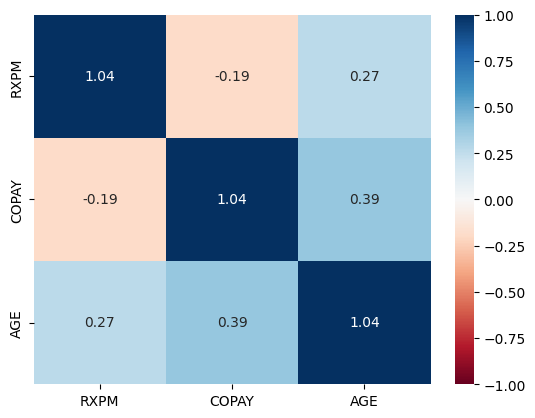

In [904]:
# Generate heatmap for covariance matrix analysis.
c = Drug_scaled.cov()
fig, ax = plt.subplots()
sns.heatmap(c, annot=True, fmt=".2f", xticklabels=c.columns, yticklabels=c.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

In [905]:
# Compute Eigenvalues and Eigenvectors.
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigenvalues:\n', eigenvalues)
print('Eigenvalues Shape:', eigenvalues.shape)
print('Eigenvectors Shape:', eigenvectors.shape)

Eigenvalues:
 [0.46388367 1.20923971 1.43401947]
Eigenvalues Shape: (3,)
Eigenvectors Shape: (3, 3)


In [906]:
# Index the eigenvalues in descending order. 
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order. 
eigenvalues = eigenvalues[idx]

# Sort the corresponding eigenvectors accordingly.
eigenvectors = eigenvectors[:,idx]

In [907]:
# Calculate explained variance from the Eigenvalues.
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.46152351, 0.8507041 , 1.        ])

In [908]:
# Determine the number of Principal Components explaining greater than or equal to 95% of variance.
n_components = np.argmax(explained_var >= 0.95) + 1
print('Number of Principal Components:', n_components)

Number of Principal Components: 3


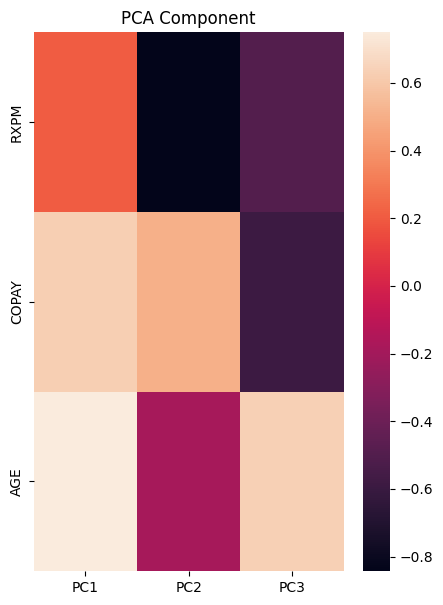

In [909]:
# Generate PCA component or unit matrix.
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u,
                             index = Drug_scaled.columns,
                             columns = ['PC1','PC2','PC3']
                            )

# Plotting heatmap.
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

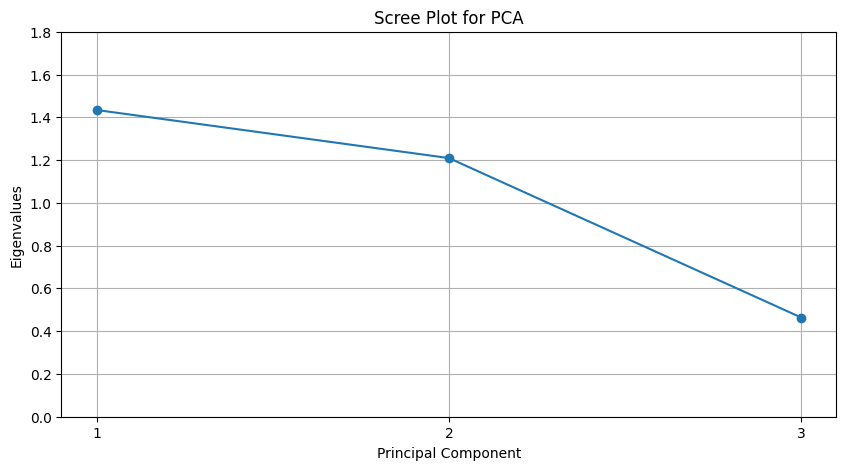

In [910]:
# Generate Scree plot for PCA.
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, marker='o', linestyle='-')
plt.title('Scree Plot for PCA')
plt.xlabel('Principal Component')
plt.xticks(np.arange(1,4,step=1))
plt.ylim(0,1.1)
plt.yticks(np.arange(0,2.0,step=0.2))
plt.ylabel('Eigenvalues')
plt.grid(True)
plt.show()

In [911]:
# Create and fit the PCA model to the standardized data frame.
pca = PCA(n_components=3)
Drug_pca = pca.fit_transform(Drug_scaled)
scores_df = pd.DataFrame(Drug_pca, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,2.235511,-2.492401,-1.136180
1,1.401770,-1.090016,-0.568234
2,1.362289,-0.077904,-0.822889
3,-0.210565,0.618994,-0.416183
4,-0.591737,-1.282258,0.600378
5,-0.335437,1.029238,0.107228
6,0.064352,2.854313,-0.908659
7,1.260777,0.433269,-0.730600
8,2.045691,1.179129,1.356292
9,0.333193,0.562502,0.327299


In [534]:
# Generate a 3D scatter plot of the observation scores for principal components.
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3', title='PCA Values 3D Scatterplot')
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50))
fig.update_layout(width=500, height=500)
fig.show()

In [912]:
# Generate a loadings table of variable parameters by loadings values for principal components.
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3'], index=Drug_scaled.columns)
df_loadings

,PC1,PC2,PC3
RXPM,0.206934,0.843478,-0.495704
COPAY,0.628602,-0.502879,-0.593273
AGE,0.749692,0.188832,0.634275


In [ ]:
# Generate a 3D scatter plot of variable parameters by loadings values for principal components.
loadings_label=df_loadings.index
fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3', text=loadings_label, title='PCA Loading Values 3D Scatterplot')
fig.update_traces(textposition='top center')
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50))
fig.update_layout(width=500, height=500)
fig.show()

In [913]:
# Generate the explained variance for the principal components.
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.46152351, 0.3891806 , 0.1492959 ])

In [914]:
# Generate the sum of the explained variance for the principal components.
sum_variance = pca.explained_variance_ratio_.sum()
sum_variance

1.0

In [915]:
# Generate a table for explained and cumulative variance for the principal components.
explained_variance = np.insert(explained_variance,0,0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))
PC_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

df_explained_variance = pd.concat([PC_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.461524,0.462
2,PC2,0.389181,0.851
3,PC3,0.149296,1.000


In [916]:
# Generate a bar and line chart for explained and cumulative variance for the principal components.
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        name="Cumulative Variance",
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    )
)

fig.add_trace(
    go.Bar(
        name="Explained Variance",
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")                        
    )
)

fig.update_layout(width=500, height=500, legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))
# fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

4.	Perform Factor Analysis on the data (exclude COST) and answer the following questions:  (25 pts) 
    a.	List the 1st, 2nd, and 3rd components and factors. (10 pts) 
    b.	How much variance do the components and factors (each) represent? (10 pts) 
    c.	Describe the chosen components and factors (10 pts.) 
    d.	Which method more efficiently expresses the data? (10 pts)   


In [917]:
# Create and fit the Factor model to the standardized data frame.
fac = FactorAnalysis(n_components=3, svd_method='lapack', rotation=None)
Drug_fac = fac.fit_transform(Drug_scaled)
scores_df = pd.DataFrame(Drug_fac, columns=['Factor 1', 'Factor 2', 'Factor 3'])
scores_df

,Factor 1,Factor 2,Factor 3
0,1.263129,1.216646,0.0
1,0.786802,0.529011,0.0
2,0.743228,0.044854,0.0
3,-0.135075,-0.286465,0.0
4,-0.296338,0.613211,0.0
5,-0.201657,-0.499200,0.0
6,-0.028761,-1.362099,0.0
7,0.679969,-0.204966,0.0
8,1.142336,-0.636146,0.0
9,0.181832,-0.286665,0.0


In [918]:
# Generate a scatter plot of the observation standardized estimates for factors.
fig = px.scatter(scores_df, x='Factor 1', y='Factor 2', title='Factor Values Scatterplot')
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50))
fig.update_layout(width=600, height=600)
fig.show()

In [919]:
# Generate a loadings table of variable parameters by loadings standardized estimates for factors.
loadings = fac.components_.T
df_loadings = pd.DataFrame(loadings, columns=['Factor 1', 'Factor 2', 'Factor 3'], index=Drug_scaled.columns)
df_loadings

,Factor 1,Factor 2,Factor 3
RXPM,0.138670,-0.475728,-0.0
COPAY,0.488629,0.282417,-0.0
AGE,0.578475,-0.127691,0.0


In [920]:
# Generate a scatter plot of variable parameters by loadings standardized estimates for factors.
loadings_label=df_loadings.index
fig = px.scatter(df_loadings, x='Factor 1', y='Factor 2', text=loadings_label, title='Variable Parameters By Factor Values Scatterplot')
fig.update_traces(textposition='top center')
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50))
fig.update_layout(width=600, height=600)
fig.show()

In [921]:
# Calculated the variance explained by the factors.
total_var = Drug_scaled.var(axis=0).sum()  # total variance of original variables,
                                    # equal to no. of vars if they are standardized

var_exp = np.sum(df_loadings**2, axis=0)
prop_var_exp = var_exp/total_var
cum_prop_var_exp = np.cumsum(var_exp/total_var)

print(f"Variance Explained:\n{var_exp.round(3)}")
print(f"Proportion of Variance Explained:\n{prop_var_exp.round(3)}")
print(f"Cumulative Proportion of Variance Explained:\n{cum_prop_var_exp.round(3)}")

Variance Explained:
Factor 1    0.593
Factor 2    0.322
Factor 3    0.000
dtype: float64
Proportion of Variance Explained:
Factor 1    0.191
Factor 2    0.104
Factor 3    0.000
dtype: float64
Cumulative Proportion of Variance Explained:
Factor 1    0.191
Factor 2    0.294
Factor 3    0.294
dtype: float64


Chi-square value: 8.449799533145901
P-value: 0.03757527068731942
KMO Model: 0.36180508427289737


c:\Users\rcc_0\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



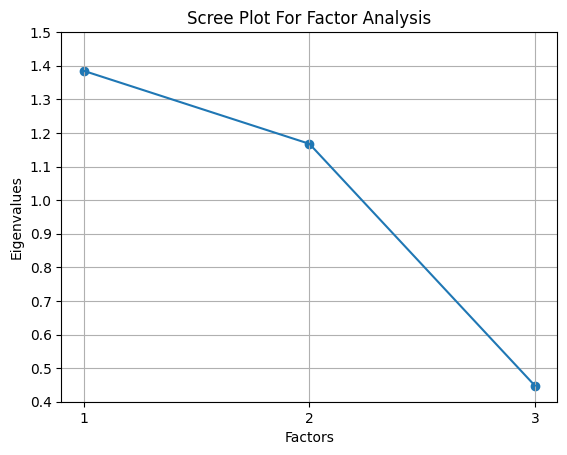

[[ 0.13861376  0.49364386  0.        ]
 [ 0.50193978 -0.29212728  0.        ]
 [ 0.59173364  0.13609191  0.        ]]


c:\Users\rcc_0\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [922]:
# Assign data frame.
data= Drug_scaled

# Apply Bartlett's test
chi_square_value, p_value = calculate_bartlett_sphericity(data)
print(f'Chi-square value: {chi_square_value}\nP-value: {p_value}')

# Apply KMO test
kmo_all, kmo_model = calculate_kmo(data)
print(f'KMO Model: {kmo_model}')

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3, rotation=None, method='ml')
fa.fit(data)

# Check Eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
plt.scatter(range(1, data.shape[1]+1), eigen_values)
plt.plot(range(1, data.shape[1]+1), eigen_values)
plt.title('Scree Plot For Factor Analysis')
plt.xlabel('Factors')
plt.xticks(np.arange(1,4,step=1))
plt.yticks(np.arange(0.4,1.51,step=0.1))
plt.ylabel('Eigenvalues')
plt.grid()
plt.show()

# Perform factor analysis with the determined number of factors
fa = FactorAnalyzer(n_factors=3, rotation=None, method='ml')
fa.fit(data)

# Get factor loadings.
loadings = fa.loadings_
print(loadings)

In [923]:
# Assign scaled data frame to a variable.
X=Drug_scaled

# Reshape the dataset.
n_samples, n_features = X.shape
X = X.values.reshape((n_samples, -1))
 
# Define the parameter grid.
param_grid = {'n_components': [1, 2, 3]}
 
# Perform model selection using GridSearchCV
ppcamodel = GridSearchCV(PCA(), param_grid=param_grid)
famodel = GridSearchCV(FactorAnalysis(), param_grid=param_grid)
 
# Fit the models
ppcamodel.fit(X)
famodel.fit(X)
 
# Access the best model and its parameters
best_ppca_model = ppcamodel.best_estimator_
best_ppca_params = ppcamodel.best_params_
 
best_fa_model = famodel.best_estimator_
best_fa_params = famodel.best_params_
 
# Apply the best model for dimensionality reduction
X_ppca = best_ppca_model.transform(X)
X_fa = best_fa_model.transform(X)
 
# Print the best models and their parameters
print("Best PCA Model:")
print(best_ppca_model)
print("Best PCA Parameters:")
print(best_ppca_params)
 
print("\nBest Factor Analysis Model:")
print(best_fa_model)
print("Best Factor Analysis Parameters:")
print(best_fa_params)
 
# Print the transformed data
print("\nTransformed Data using PCA:")
print(X_ppca)
print("\nTransformed Data using Factor Analysis:")
print(X_fa)

Best PCA Model:
PCA(n_components=1)
Best PCA Parameters:
{'n_components': 1}

Best Factor Analysis Model:
FactorAnalysis(n_components=3)
Best Factor Analysis Parameters:
{'n_components': 3}

Transformed Data using PCA:
[[ 2.2355113 ]
 [ 1.40176999]
 [ 1.36228906]
 [-0.21056526]
 [-0.59173747]
 [-0.33543714]
 [ 0.06435207]
 [ 1.26077725]
 [ 2.04569141]
 [ 0.33319291]
 [ 0.47162499]
 [ 0.80006783]
 [ 1.37613732]
 [ 0.31410553]
 [ 1.01358094]
 [-0.87514653]
 [ 1.23375909]
 [ 0.34421849]
 [-0.2742825 ]
 [-1.1164343 ]
 [-1.41169387]
 [-0.96486109]
 [-1.35049842]
 [-0.92653006]
 [-0.49455006]
 [-0.5142777 ]
 [-1.1859765 ]
 [-2.94728503]
 [-1.05780224]]

Transformed Data using Factor Analysis:
[[-1.26312903 -1.21664601  0.        ]
 [-0.78680201 -0.5290105   0.        ]
 [-0.74322754 -0.0448535   0.        ]
 [ 0.13507527  0.28646541  0.        ]
 [ 0.29633837 -0.61321124  0.        ]
 [ 0.20165715  0.49919981  0.        ]
 [ 0.02876085  1.36209933  0.        ]
 [-0.67996866  0.2049661   0.  

4a.	List the 1st, 2nd, and 3rd components and factors. (10 pts) 
1st Principal Component includes a good positive loading for AGE (0.750) and COPAY (0.629).
2nd Principal Component includes a great positive loading for RXPM (0.843).
3rd Principal Component includes a good positive loading for AGE (0.634).
1st Factor includes a reasonable positive loading for AGE (0.578) and COPAY (0.489).
2nd Factor includes a positive loading for COPAY (0.282).
3rd Factor was not relevant.

4b.	How much variance do the components and factors (each) represent? (10 pts)
1st Principal Component = 0.462
2nd Principal Component = 0.389
3rd Principal Component = 0.149
1st Factor = 0.593
2nd Factor = 0.322
3rd Factor = 0

4c. Describe the chosen components and factors (10 pts.)
The 1st and 2nd Principal Components and Factors would be chosen due to their eigenvalues being greater than or equal to 1. 
This is clearly shown on their respective Scree plots.  

4d.	Which method more efficiently expresses the data? (10 pts)
Believe that Principal Component method works best in this circumstance.  In the Factor method, no estimates for Factor 3 
were generated, only 0.295 cumulative proportion of variance was explained, and the Kaiser-Meier-Olkin(KMO) test yielded 
a 0.362 value which indicates that the data is unacceptable for analysis. See below.

The following criteria are used for evaluating KMO:

Above 0.90 - Marvelous
0.80 to 0.90 - Meritorious
0.7 to 0.80 - Average
0.60 to 0.70 - Mediocre
0.50 to 0.60 - Terrible
Below 0.50 - Unacceptable

Given that all three variables had high loadings in the 1st and 2nd Principal Components, I will probably go ahead and use
them in the OLS regression model to start, and see what ANOVA analysis yields.

5.	Perform multiple regression on the data and evaluate overall fit. (25 pts)  

In [924]:
# Find design matrix for regression model using 'COST' as response variable. 
y, X = dmatrices('COST ~ AGE+COPAY+RXPM', data=Drug_df, return_type='dataframe')

# Create data frame to hold VIF values.
vif_df = pd.DataFrame()
vif_df['Variable'] = X.columns 

# Calculate VIF for each predictor variable. 
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View VIF for each predictor variable. 
vif_df

,Variable,VIF
0,Intercept,565.279550
1,AGE,1.334697
2,COPAY,1.287837
3,RXPM,1.188915


In [925]:
# Set Alpha standard for regression model testing.
alpha = 0.05

In [926]:
# Generate required OLS multiple linear regression model.
Drug_tar = Drug_df[['COST']]
Drug_tar['Index'] = range(1, len(Drug_tar)+1)
Drug_scaled['Index'] = range(1, len(Drug_scaled)+1)
Drug_reg = Drug_tar.merge(Drug_scaled, on='Index', how='left')
# Fit linear regression model.
lm = smf.ols("COST ~ RXPM + COPAY + AGE", data = Drug_reg).fit()
# View model coefficients.
print(lm.params)


Intercept    1.233448
RXPM         0.019600
COPAY        0.023949
AGE         -0.051757
dtype: float64


C:\Users\rcc_0\AppData\Local\Temp\ipykernel_29188\2478236418.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [927]:
# Calculate the Total Sum of Squares (SST) for an empty model for 'COST'.
Y = Drug_df['COST'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 0.339


                            OLS Regression Results                            
Dep. Variable:                   COST   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     1.732
Date:                Sun, 02 Mar 2025   Prob (F-statistic):              0.186
Time:                        17:58:40   Log-Likelihood:                 26.098
No. Observations:                  29   AIC:                            -44.20
Df Residuals:                      25   BIC:                            -38.73
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2334      0.020     62.685      0.0

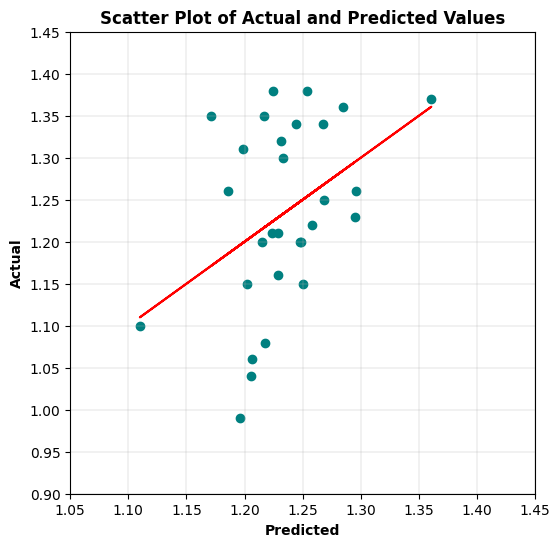

In [928]:
# Generate OLS Regression results for the multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Defined X variable for future use.
X = Drug_scaled[['AGE','COPAY','RXPM']]
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}",'\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,3,4)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=3))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")
# Display Predicted vs. Actual values scatter plot.
predicted = lm.predict(X)
# Generate a scatter plot for fitted and actual values.
plt.figure(figsize=(6,6))
plt.scatter(predicted, Y, c='teal')
m, b = np.polyfit(predicted, Y, 1)
plt.plot(predicted, m*predicted+b, color='red')
plt.title('Scatter Plot of Actual and Predicted Values', fontweight='bold')
plt.xlabel('Predicted', fontweight='bold')
plt.ylabel('Actual', fontweight='bold')
plt.xticks(np.arange(1.05,1.5,step=.05)) 
plt.yticks(np.arange(0.9,1.5,step=.05)) 
plt.grid(linewidth=0.25)
plt.show()

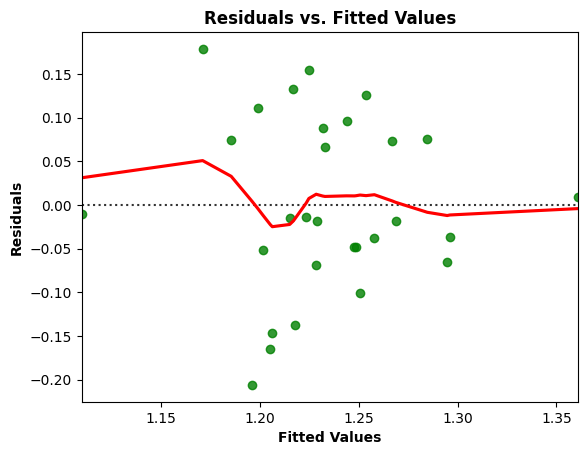

In [929]:
# Display Residuals vs. Fitted values scatter plot.
fitted = lm.fittedvalues
residuals = lm.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [930]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.379
15.000: 0.520, data looks normal (fail to reject H0)
10.000: 0.592, data looks normal (fail to reject H0)
5.000: 0.710, data looks normal (fail to reject H0)
2.500: 0.828, data looks normal (fail to reject H0)
1.000: 0.985, data looks normal (fail to reject H0)


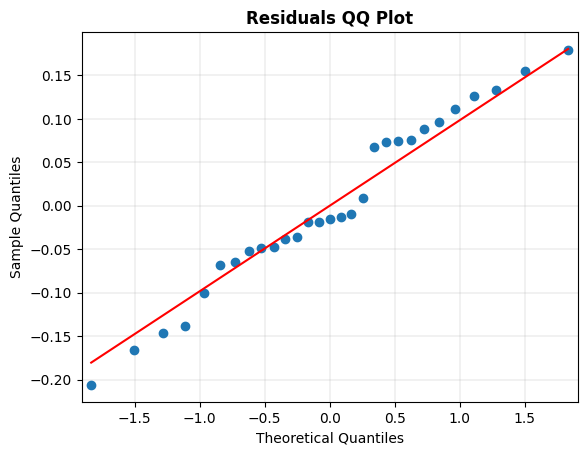

In [931]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

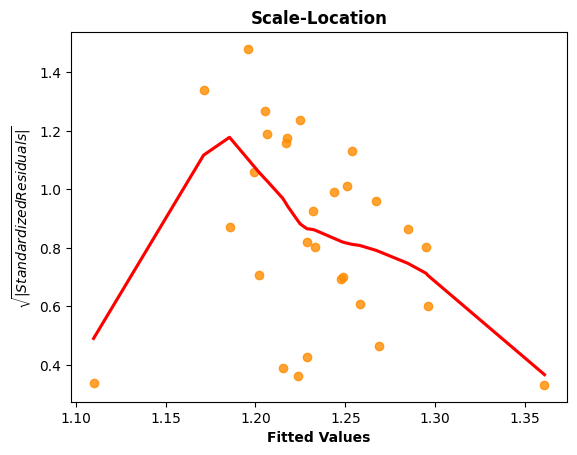

In [932]:
# Scale-Location Plot
resid_standardized = lm.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [933]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(lm.resid, lm.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 11.239 lm_pvalue: 0.011


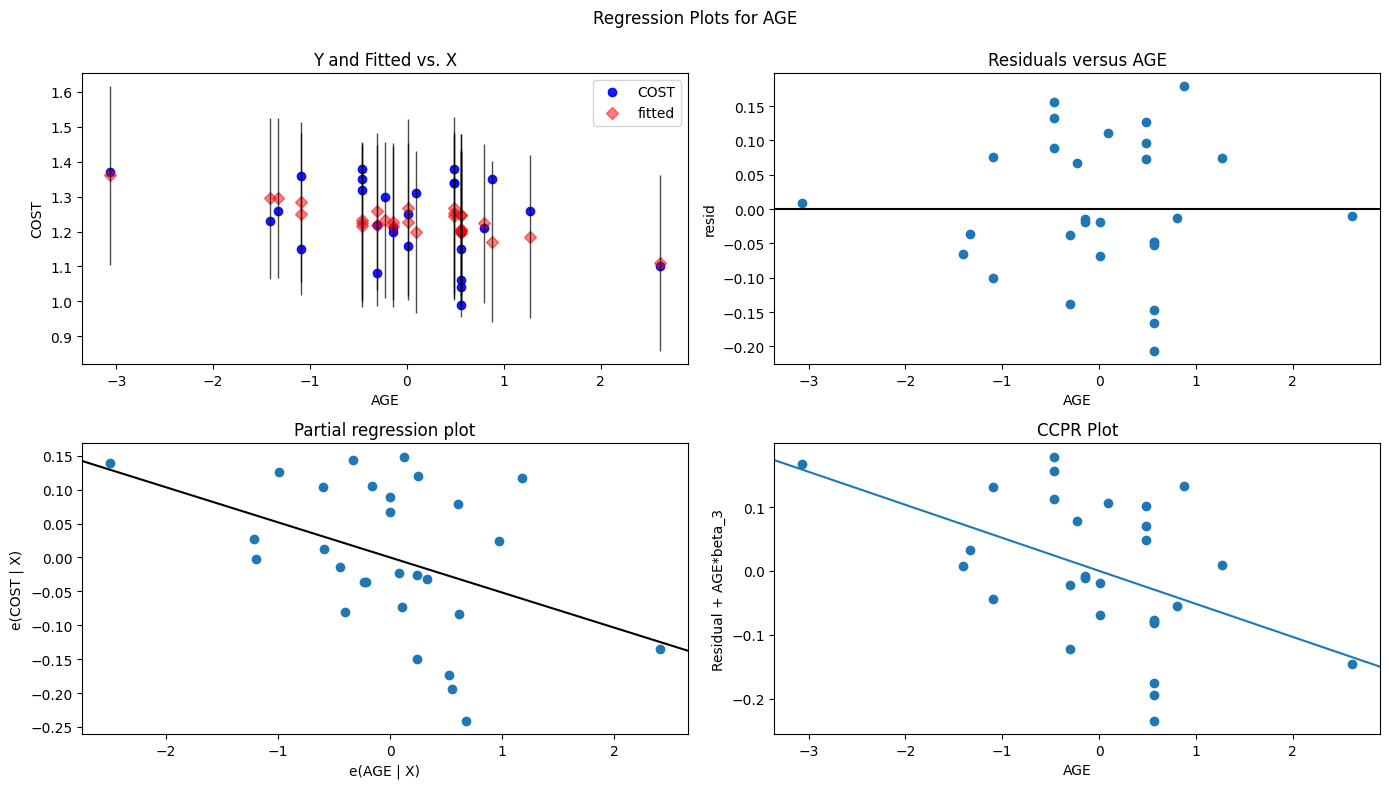

In [934]:
# Display model regression plots for the 'AGE' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'AGE',fig=fig)
plt.show()

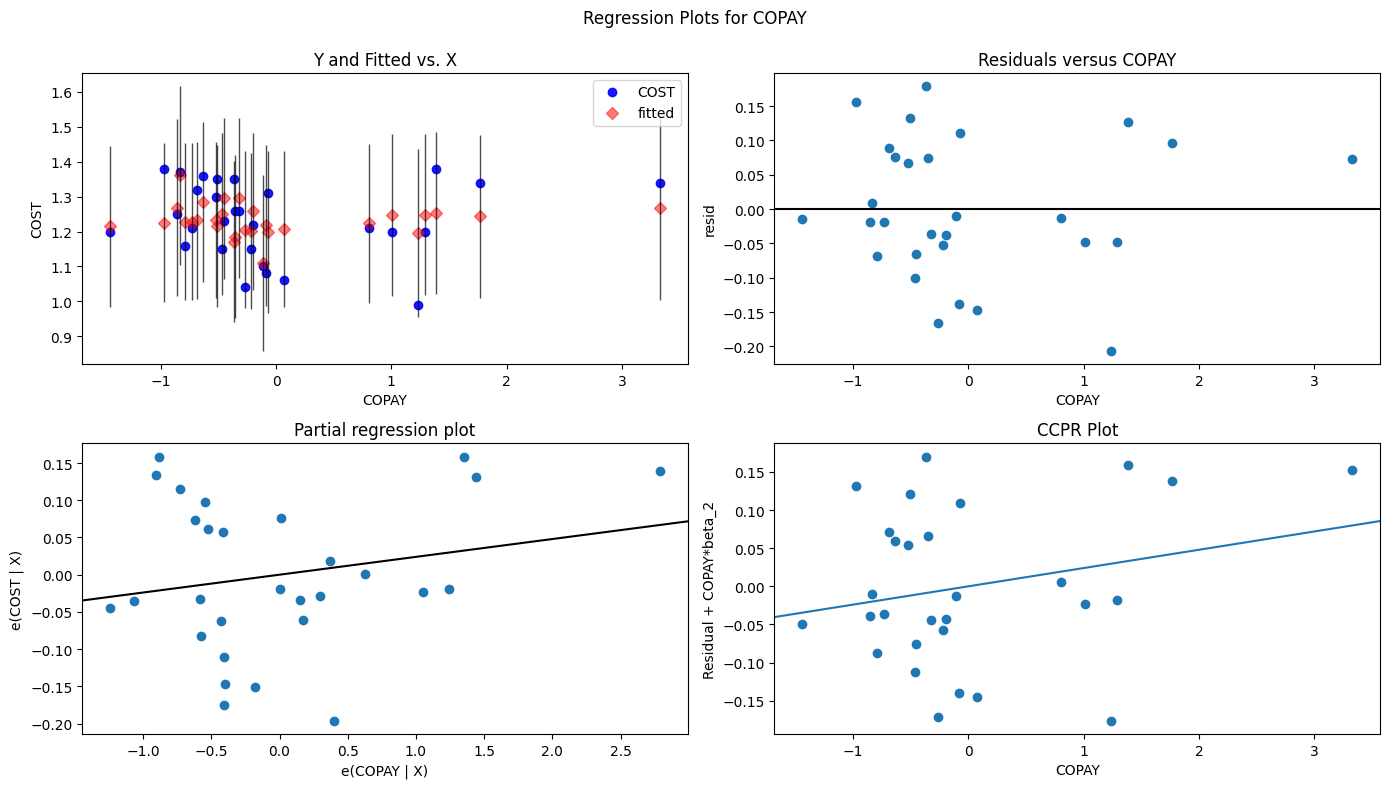

In [935]:
# Display model regression plots for the 'COPAY' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'COPAY',fig=fig)
plt.show()

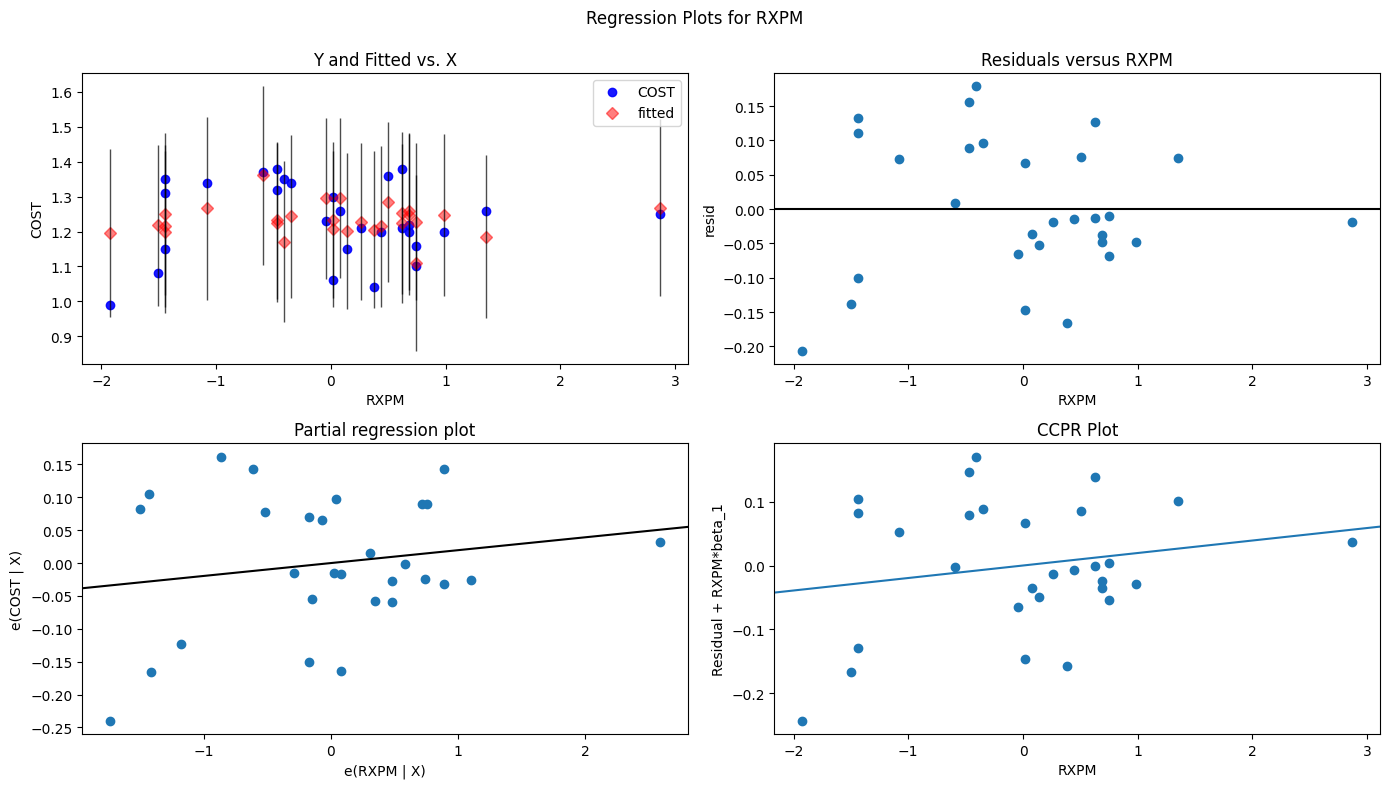

In [936]:
# Display model regression plots for the 'RXPM' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(lm,'RXPM',fig=fig)
plt.show()

5  Evaluate overall fit.

The required OLS multiple regression model was run with COST as the outcome variable, and with all three standardized explanatory variables 
(AGE, COPAY, and RXPM).  The R-squared value of 0.172 indicates that 17.2% of the variation in the predicted COST values can be explained 
by this multiple linear regression model. The Y intercept, beta0, equals 1.23 presciption cost/day, RXPM, beta1, equals 0.02 prescription 
cost/day per a member prescription/year, COPAY, beta2, equals 0.24 prescription cost/day per 1 dollar of average Rx copayment, and AGE, beta3,
equals -0.05 prescription cost/day per 1 year of average member age. The F-statistic of 1.732 fell considerably short of the F-critical of 
6.591, and the F-statistic probability was 0.186, notably over the 0.05 alpha standard (accepting H0 the null hypothesis), indicating clearly 
that none of the expalanatory variables are statistically significant to the COST outcome variable. All three explanatory variables had a 
t-statistic that was less the absolute t-critical of 3.182, and only AGE had a p-value under the 0.05 alpha standard (rejecting H0 the 
null hypothesis), demonstrating some potential statistical significance.

With COST having a SST of 0.339, the OLS MLR model reduced it 0.058 to a SSR of 0.281. When plotting the residuals and the fitted value, 
there was notable curvelinearity in the model, but it stayed around the zero residual line. Concerning normality of the residuals, the 
Jarque-Bera test statistic of 0.729 and Jarque-Bera probability of 0.624, notably above the 0.05 alpha standard (accepting H0 the null 
hypothesis), indicating normality. The Anderson-Darling result of 0.327 was a strong indicator of normality, and QQ plot rendering supported
the same conclusion.  The Scale-Location chart showed significant fluctuation that indicates heteroscedasticity in the model, and the 
Breusch-Pagan test statistic of 11.239 and p-value of 0.011, safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), 
indicating that heteroscedasticity is present in the model.  In addition, a simple linear model with AGE as the sole explanatory variable was 
ran and remained statistically insignificant.  Just about every model metric above with the exception of normality indicate that this 
OLS MLR model would not be a good predictor of COST.

6.	Perform generalized linear analysis on the data and evaluate overall fit. (25 pts)  
    a.	Explain the differences in performance of the two models (GLM and multiple regression). (10 pts) 

In [937]:
X = Drug_scaled[['AGE','COPAY','RXPM']]
y = Drug_df[['COST']]
# Use Elastic Net model for initial evaluation.
model = ElasticNet()
# Define model evaluation method.
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# Define grid.
grid = dict()
grid['alpha'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
grid['l1_ratio'] = np.arange(0, 1, 0.01)
# Define search.
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# Perform the search.
results = search.fit(X, y)
# Summarize results.
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.095
Config: {'alpha': 1.0, 'l1_ratio': 0.01}


In [938]:
# Use Ridge model for further evaluation.
model = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.099
Config: {'alpha': 0.99}


In [939]:
# Fit Ridge model.
ridge = Ridge(alpha=0.99)
ridge.fit(X, y)

# Make predictions.
predictions = ridge.predict(X)

# Create a DataFrame for ANOVA.
df_anova = pd.DataFrame({'predictions': predictions, 'feature1': X['AGE'], 'feature2': X['COPAY'], 'feature3': X['RXPM']})

# Perform ANOVA.
model = smf.ols('predictions ~ feature1 + feature2 + feature3', data=df_anova).fit()

In [940]:
# Generate Ridge Regression results for the regularized linear regression model.
print(model.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {model.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-model.ssr:0,.3f}", '\n')
# Generate the critical F-statistic.
F_critical = scipy.stats.f.ppf(1-alpha,3,4)
print(f"F_critical: {F_critical:.3f}")
# Generate the absolute critical t-statistic.
t_critical = abs(scipy.stats.t.ppf(q=alpha/2,df=3))
print(f"Absolute t_critical: {t_critical:.3f}")
# Display expected Alpha standard.
print(f"Alpha Standard: {alpha:.2f}")

                            OLS Regression Results                            
Dep. Variable:            predictions   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.872e+28
Date:                Sun, 02 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:01:26   Log-Likelihood:                 963.79
No. Observations:                  29   AIC:                            -1920.
Df Residuals:                      25   BIC:                            -1914.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2334   1.78e-16   6.91e+15      0.0

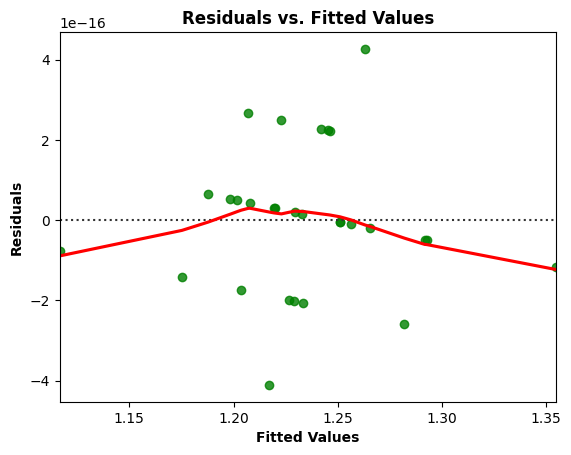

In [941]:
# Display Residuals vs. Fitted values scatter plot.
fitted = model.fittedvalues
residuals = model.resid
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'}, color='green') 
plt.title('Residuals vs. Fitted Values', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.show()

In [942]:
# Residuals Anderson-Darling Normality Test
result = anderson(residuals)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.853
15.000: 0.520, data does not look normal (reject H0)
10.000: 0.592, data does not look normal (reject H0)
5.000: 0.710, data does not look normal (reject H0)
2.500: 0.828, data does not look normal (reject H0)
1.000: 0.985, data does not look normal (reject H0)


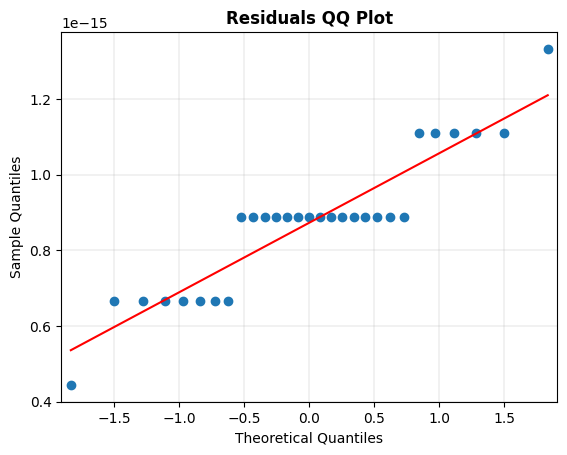

In [943]:
# Residuals QQ Plot
qqplot(residuals, line='s')
plt.title('Residuals QQ Plot', fontweight='bold')
plt.grid(linewidth=0.25)
plt.show()

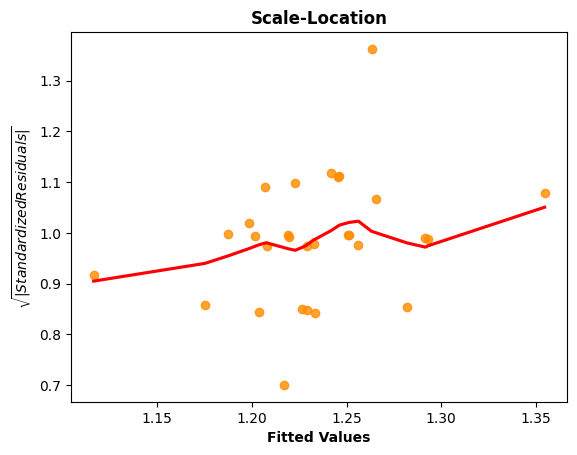

In [944]:
# Scale-Location Plot
resid_standardized = model.get_influence().resid_studentized_internal

sns.regplot(x=fitted, y=np.sqrt(np.abs(resid_standardized)), color='darkorange',
            ci=None, lowess=True, line_kws={'color': 'red'})
plt.title('Scale-Location', fontweight='bold')
plt.xlabel('Fitted Values', fontweight='bold')
plt.ylabel(r'$\sqrt{|Standardized Residuals|}$', fontweight='bold')
plt.show()

In [945]:
# Generate the Breusch-Pagan test for heteroscedasticity.
bp_test = het_breuschpagan(model.resid, model.model.exog)
print("lm:", f"{bp_test[0]:0,.3f}", "lm_pvalue:", f"{bp_test[1]:0,.3f}")

lm: 19.256 lm_pvalue: 0.000


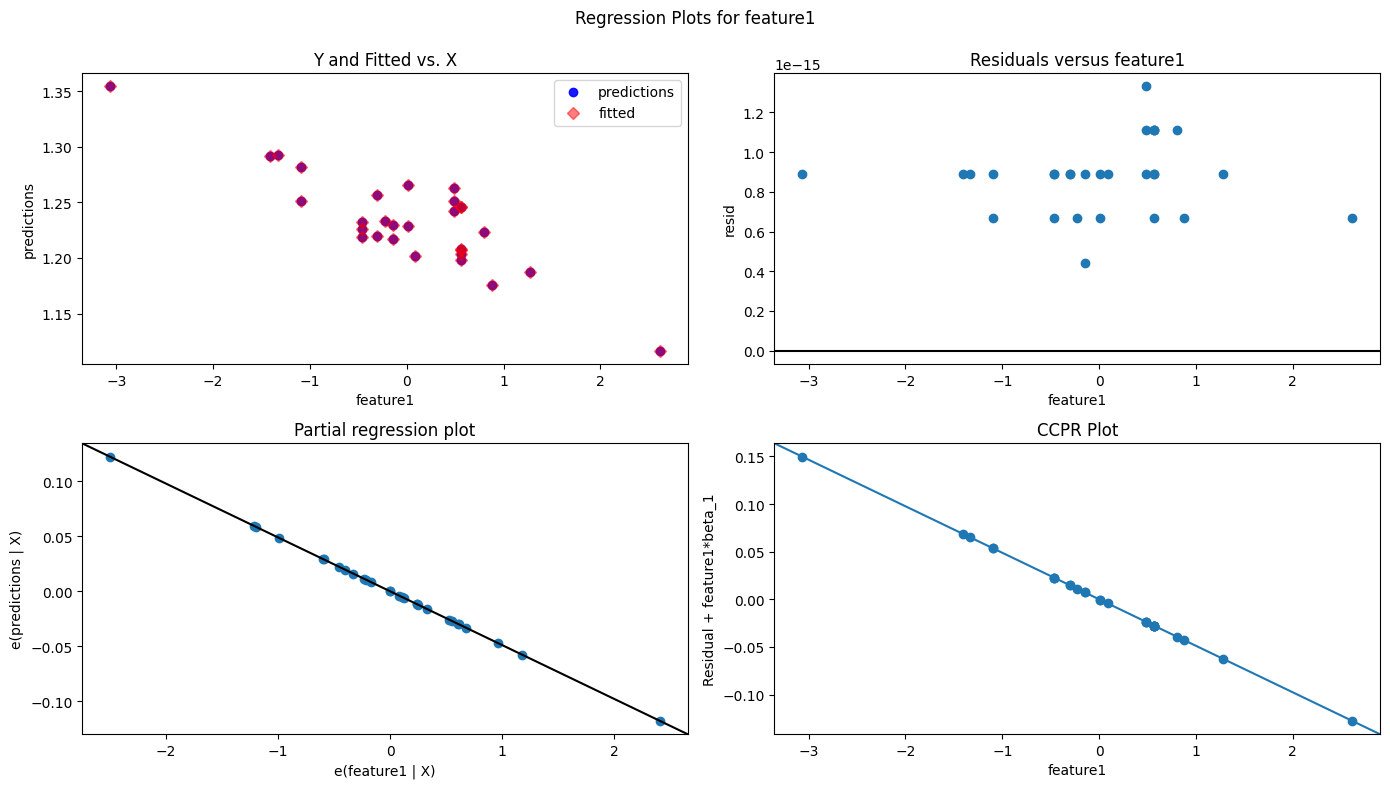

In [946]:
# Display model regression plots for the 'AGE' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(model,'feature1',fig=fig)
plt.show()

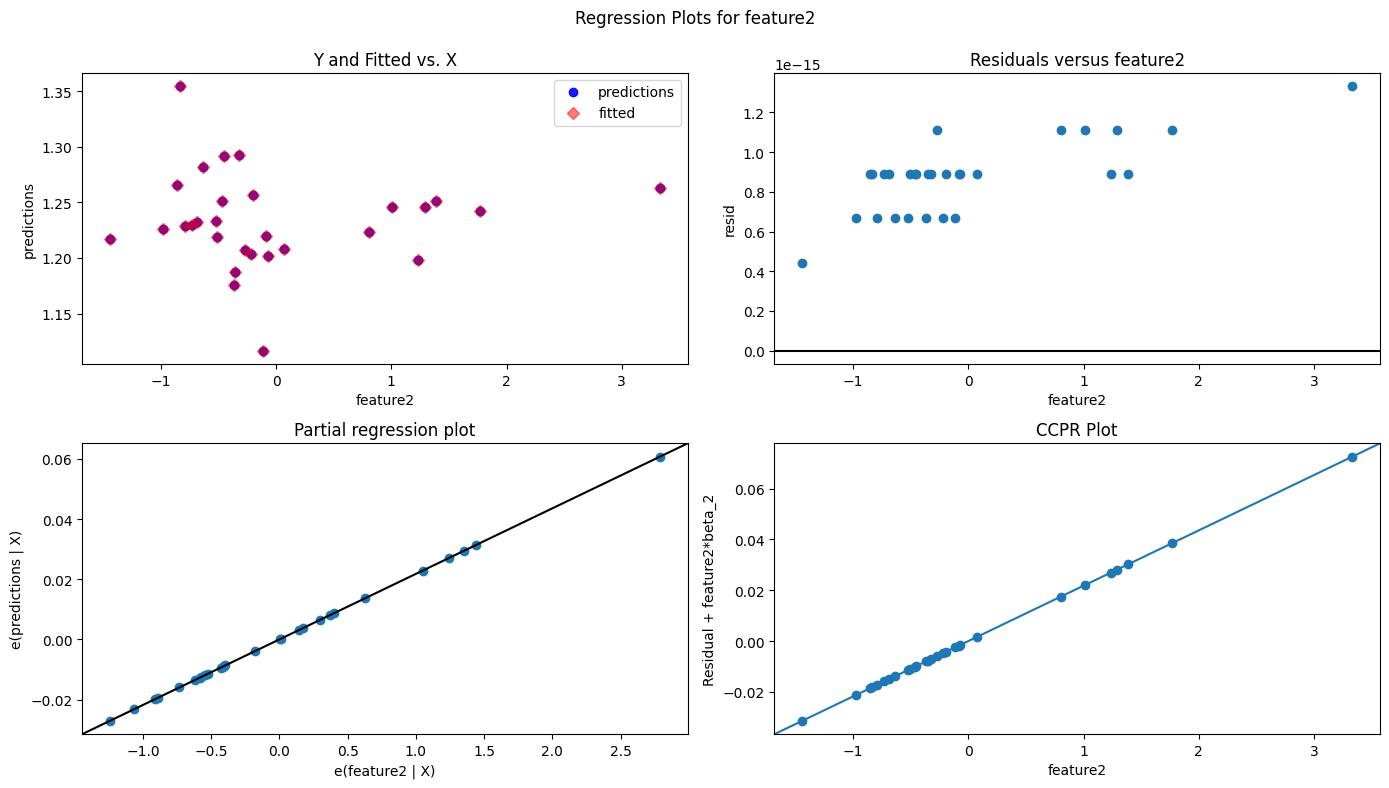

In [947]:
# Display model regression plots for the 'COPAY' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(model,'feature2',fig=fig)
plt.show()

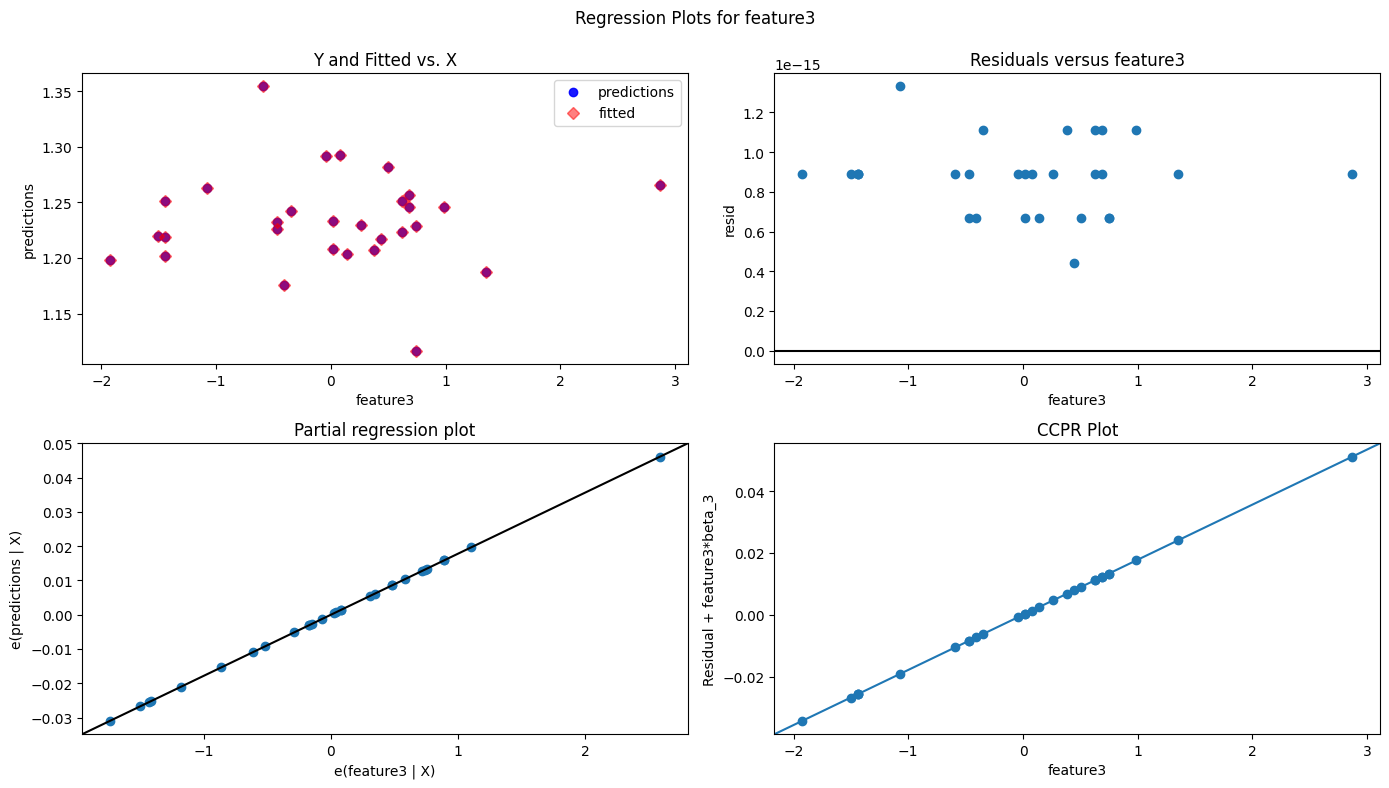

In [948]:
# Display model regression plots for the 'RXPM' variable.
fig = plt.figure(figsize=(14,8))
fig = sm.graphics.plot_regress_exog(model,'feature3',fig=fig)
plt.show()

6  Evaluate overall fit.

The required regularized GLM Ridge regression model was run with COST as the outcome variable, and with all three standardized explanatory 
variables (AGE, COPAY, and RXPM).  The R-squared value of 1.000 indicates that 100% of the variation in the predicted COST values can be 
explained by this GLM Ridge regression model. The Y intercept, beta0, equals 1.23 presciption cost/day, feature1: AGE, beta1, equals -0.49 
prescription cost/day per 1 year of average member age, feature2: COPAY, beta2, equals 0.22 prescription cost/day per 1 dollar of average 
Rx copayment, and feature3: RXPM, beta3, equals 0.18 prescription cost/day per a member prescription/year. The F-statistic of 1.872e+28 
is a blast off that leaves of the F-critical of 6.591 on the planet, and the F-statistic probability was near zero, safely under the 0.05 
alpha standard (rejecting H0 the null hypothesis), indicating clearly that at least one of the expalanatory variables are statistically 
significant to the COST outcome variable. All three explanatory variables had rocket ship t-statistics that were less the absolute t-critical 
of 3.182, and p-values near zero under the 0.05 alpha standard (rejecting H0 the null hypothesis), demostrating statistical significance with 
the COST outcome variable.

With COST having a SST of 0.339, the GLM Ridge model reduced it 0.339 to a SSR of 0. When plotting the residuals and the fitted value, 
some linearity was present in the model. Concerning normality of the residuals, the Jarque-Bera test statistic of 0.147 and Jarque-Bera 
probability of 0.929, notably above the 0.05 alpha standard (accepting H0 the null hypothesis), indicating normality. The Anderson-Darling 
result of 1.853 did not pass for normality, and QQ plot rendering supported the same conclusion.  The Scale-Location chart showed a gradual
increase indicating some heteroscedasticity in the model, and the Breusch-Pagan test statistic of 19.256 and p-value of 0, safely under the 
0.05 alpha standard (rejecting H0 the null hypothesis), indicate that heteroscedasticity is present in the model.  Realize that the idea of 
using an OLS Multiple Linear Regression assessment of the GLM Ridge regression model predictions may only confirm certain improvements, but 
curiousity got the best of me.  The perfect R squared value, lights out F-statistic, high log-likelihood value, and low AIC/BIC values are 
an indicator that this GLM Ridge regression model would potentially be a good predictor of COST.

6a.	Explain the differences in performance of the two models (GLM and multiple regression). (10 pts) 

In trying to settle on an appropriate GLM modeling strategy, I used a GridSearchCV for an Elastic Net model to get a L1-ratio value. Getting
0.01 for an L1-ratio, two important model determining points were recognized.  One, with so little L1 influence being required with respect 
to L2, the LASSO method would not be appropriate, given it relies on the L1 value.  Two, for Elastic Net to be the best choice, there would 
need to be reasonable proportions of L1 and L2 to make using it beneficial, but not with a 0.99 L2 influence.  Consequently, I was lead to 
the Ridge method.  Performed another GridSearchCV for the appropriate alpha value for the Ridge model, and not surprisingly, a 0.99 alpha 
value was generated.

Multi-collinearity was not a problem, but there was significant heteroscedasticity in the MLR model.  Considered using a Weighted Least Squares
method, but was not listed as a regularized Generalized Regression method in the book.  Still haven't completely got my head around these 
Generalized Linear Models yet, but believe there was a significant improvement using the Ridge method in this case. Know that we will be using 
GLMs in our next course, so I will get a chance to work with them more.  Sutha, I appreciate all your help in this course.  Wish you the best, 
and will try to keep in touch as we discussed.  Believe I will be headed back to R and SAS in the next course, and appreciate all the R code 
and Python resources that you have provided.  